In [1]:
from helper import *
from math import log,pi

inpu_data1 = read_input('LS_Group05/Class1.txt')
inpu_data2 = read_input('LS_Group05/Class2.txt')
inpu_data3 = read_input('LS_Group05/Class3.txt')

train_data1,test_data1 = part_data(inpu_data1)
train_data2,test_data2 = part_data(inpu_data2)
train_data3,test_data3 = part_data(inpu_data3)

train_data=[train_data1,train_data2,train_data3]
test_data =[test_data1, test_data2, test_data3]

mean1,variance1 = get_stats(train_data1)
mean2,variance2 = get_stats(train_data2)
mean3,variance3 = get_stats(train_data3)

total_test_data = test_data1+test_data2+test_data3

cov1 = cov_matrix(train_data1,mean1)
cov2 = cov_matrix(train_data2,mean2)
cov3 = cov_matrix(train_data3,mean3)


# For part a
def cov_task1():
    cov= matrix_add([variance1],[variance2])
    cov= matrix_add(cov,[variance3])
    X=cov
    
    cov=matrix_add([[cov[0][0]]],[[cov[0][1]]])
    cov=cov_div(cov,6.0)
    cov=[[cov[0][0] if(i==j) else 0 for j in range(0,len(X[0]))] for i in range(0,len(X[0]))]
    return cov

# for part b
def cov_task2():
    cov1 = cov_matrix(train_data1,mean1)
    cov2 = cov_matrix(train_data2,mean2)
    cov3 = cov_matrix(train_data3,mean3)

    cov= matrix_add(cov1,cov2)
    cov= matrix_add(cov,cov3)
    
    cov=cov_div(cov,3.0)
    return cov

# For part c
def cov_task3():
    cov1 = cov_diagonal(cov_matrix(train_data1,mean1))
    cov2 = cov_diagonal(cov_matrix(train_data2,mean2))
    cov3 = cov_diagonal(cov_matrix(train_data3,mean3))

    return cov1,cov2,cov3


# print mean1, variance1
# print mean2, variance2
# print mean3, variance3

# print cov1
# print cov2
# print cov3

# print cov_task1()
# print cov_task2()
# print cov_task3()

In [2]:
# General function for calculating g(x)
def g_x(test_data, mean, cov):
    ans=[]
    cov_inv = inverse_matrix(cov)

#   t2 = -log(2*pi)
    t3 = log(get_determinant(cov))/2.0
    t4 = log(len(test_data)/(float)(len(total_test_data)))
    
    for i in range(0,len(test_data)):
        a = get_difference_vector(test_data[i],mean)
        b = transpose(a)
        result = matrix_multiply(a,cov_inv)
        result = matrix_multiply(result,b)
        result = result[0][0]
        t1 = -1.0*result/2.0
        ans.append(t1+t3+t4)
    return ans

In [3]:
def stats(cov_a,cov_b,cov_c):
    test_data_name = total_test_data
    res1=g_x(test_data_name, mean1, cov_a)
    res2=g_x(test_data_name, mean2, cov_b)
    res3=g_x(test_data_name, mean3, cov_c)

    def dbb():
        ans=[]
        for i in range(0,len(res1)):
    #         print res1[i],res2[i],res3[i]
            val=1
            temp=res1[i]
            if(res2[i]>temp):
                val=2
                temp=res2[i]
            if(res3[i]>temp):
                val=3
            ans.append(val)
        return ans
    ans= dbb()
    def conf_mat():
        m=[]
        count1=0
        count12=0
        count2=0
        count21=0
        count3=0
        count31=0
        for i in range(0, len(test_data1)):
            if(ans[i]==1):
                count1 = count1+1;
            if(ans[i]==2):
                count12 = count12+1;
        for i in range(len(test_data1), len(test_data1)+len(test_data2)):
            if(ans[i]==2):
                count2 = count2+1;
            if(ans[i]==1):
                count21 = count21+1;
        for i in range(len(test_data1)+len(test_data2), len(total_test_data)):
            if(ans[i]==3):
                count3 = count3+1;
            if(ans[i]==1):
                count31 = count31+1;
    #     print len(test_data1), count1
    #     print len(test_data2), count2
        mm=[count1,count12,len(test_data1)-count1-count12]
        m.append(mm)
        mm=[count21, count2, len(test_data2)-count21-count2]
        m.append(mm)
        mm=[count31, len(test_data3)-count31-count3, count3]
        m.append(mm)
        return m

    m=conf_mat()
    accuracy=(sum([m[i][i] for i in range(0,3)]))/(float)(sum([sum(m[i]) for i in range(0,3)]))
    precision=[m[i][i]/(float)(m[0][i]+m[1][i]+m[2][i]) for i in range(0,3)]
    recall=[m[i][i]/(float)(m[i][0]+m[i][1]+m[i][2]) for i in range(0,3)]
    f_measure=[(2*precision[i]*recall[i])/(precision[i]+recall[i]) for i in range(0,3)]
    
    mean_precision=sum([precision[i] for i in range(0,3)])/3.0
    mean_recall=sum([recall[i] for i in range(0,3)])/3.0
    mean_f_measure=sum([f_measure[i] for i in range(0,3)])/3.0
    
    print "Confusion Matrix : {0}".format(m)
    print "Accuracy :",accuracy
    print "Precision :{0}".format(precision),"Mean Precision :",mean_precision
    print "Recall :{0}".format(recall),"Mean Recall :",mean_recall
    print "F-measure :{0}".format(f_measure),"Mean F-measure :",mean_f_measure


In [4]:
legend_facecolor='#f6ffc6'
legend_edgecolor='#ff07ff'
legend_linewidth=2
legend_loc='upper right'

c={}
c[1]='#54bdff' # blue Class Color
c[2]='#9ef442' # green
c[3]='#FFB74D' # red

c2={}
c2[1]='#2205c4' # Training Points Color
c2[2]='#388E3C'
c2[3]='#ad061f'

def plot_(XY,res,a,b,c,c2):
    a=a-1
    b=b-1
    x=[]
    y=[]
    for i in range(0,4):
        vv=[]
        v=[]
        x.append(v)
        y.append(vv)
    for i in range(0,len(res[a])):
#         print res1[i],res2[i],res3[i]
        val=a
        if(res[b][i]>res[a][i]):
            val=b
        x[val].append(XY[i][0])
        y[val].append(XY[i][1])
    
    plt.plot(x[a],y[a],c=c[a],marker='.',linestyle='None')
    plt.plot(x[b],y[b],c=c[b],marker='.',linestyle='None')

    X=[train_data[a][i][0] for i in range(0,len(train_data[a])) ]
    Y=[train_data[a][i][1] for i in range(0,len(train_data[a])) ]
    plt.plot(X,Y,c=c2[a],marker='.',linestyle='None')

    X=[train_data[b][i][0] for i in range(0,len(train_data[b])) ]
    Y=[train_data[b][i][1] for i in range(0,len(train_data[b])) ]
    plt.plot(X,Y,c=c2[b],marker='.',linestyle='None')

#     plt.rcParams['figure.figsize'] = [20, 12]
    plt.title('Class{0} vs Class{1}'.format(a+1,b+1), fontsize=14)
    
    
#     colors = [c[a],c[b],c2[a],c2[b]]
#     texts = ["Class {0}".format(a+1),"Class {0}".format(b+1),"Test {0}".format(a+1), "Test {0}".format(b+1)]
    
#     handles = [plt.Rectangle((0,0),1,1,color=colors[i]) for i  in range(len(texts))]
#     legend=plt.legend(handles=handles, labels=texts, frameon=1,loc=legend_loc, ncol=2)
    
#     frame = legend.get_frame()
#     frame.set_facecolor(legend_facecolor)
#     frame.set_edgecolor(legend_edgecolor)
#     frame.set_linewidth(legend_linewidth)


# Function for plotting part(a,b,c,d)

In [5]:
import numpy as np
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.mlab as mlab 

def task(cov_a,cov_b,cov_c,contour=False):

    X=np.linspace(-20,30,400)
    Y=np.linspace(-20,30,400)

    XX=[]
    YY=[]
    for i in range(0, len(X)):
        for j in range(0, len(X)):
            XX.append(X[i])

    for i in range(0, len(Y)):
        for j in range(0, len(Y)):
            YY.append(Y[j])

    XY=[[XX[i],YY[i]] for i in range(0,len(XX))]

    test_data_name = XY

    res=[]
    res.append(g_x(test_data_name, mean1, cov_a))
    res.append(g_x(test_data_name, mean2, cov_b))
    res.append(g_x(test_data_name, mean3, cov_c))
    
    x=[]
    y=[]
    for i in range(0,4):
        vv=[]
        v=[]
        x.append(v)
        y.append(vv)

    def db123():
        for i in range(0,len(res[0])):
    #         print res1[i],res2[i],res3[i]
            val=1
            temp=res[0][i]
            if(res[1][i]>temp):
                val=2
                temp=res[1][i]
            if(res[2][i]>temp):
                val=3
            x[val].append(XY[i][0])
            y[val].append(XY[i][1])

    db123()
    matplotlib.style.use('seaborn')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,14))
#     fig.subplots_adjust(hspace=0.4, wspace=0.4)
#     fig.suptitle('Dataset 1 (Linearly Separable Data) plots across Classes', fontsize=22)

    
    plt.subplot(221)
    
    l1=plt.plot(x[1],y[1],c[1],marker='.',linestyle='None')
    l2=plt.plot(x[2],y[2],c[2],marker='.',linestyle='None')
    l3=plt.plot(x[3],y[3],c[3],marker='.',linestyle='None')

    X=[train_data1[i][0] for i in range(0,len(train_data1)) ]
    Y=[train_data1[i][1] for i in range(0,len(train_data1)) ]
    l4=plt.plot(X,Y,c=c2[1],marker='.',linestyle='None')

    X=[train_data2[i][0] for i in range(0,len(train_data2)) ]
    Y=[train_data2[i][1] for i in range(0,len(train_data2)) ]
    l5=plt.plot(X,Y,c=c2[2],marker='.',linestyle='None')

    X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
    Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
    l6=plt.plot(X,Y,c=c2[3],marker='.',linestyle='None')

#     plt.rcParams['figure.figsize'] = [20, 12]
    plt.title('Class1 vs Class2 vs Class3', fontsize=14)

    colors = [c[1],c2[1],c[2],c2[2],c[3],c2[3]]
    texts = ["Class 1","Training 1", "Class 2", "Training 2", "Class 3","Training 3"]
    
    handles = [plt.Rectangle((0,0),1.5,1.5,color=colors[i]) for i  in range(len(texts))]

    legend=fig.legend(handles=handles, labels=texts,loc='right', ncol=1, frameon=1,
                      labelspacing=1.5, borderpad=0.75, prop=dict(weight='black',size='large'))
    
    frame = legend.get_frame()
    frame.set_facecolor(legend_facecolor)
    frame.set_edgecolor(legend_edgecolor)
    frame.set_linewidth(legend_linewidth)
    
    if(contour==True):
        delta = 0.025
        xu = np.linspace(-20,30,400)
        yu = np.linspace(-20,30,400)
        XI, YI = np.meshgrid(xu, yu)
        
        sigmax1=pow(cov_a[0][0],0.5)
        sigmay1=pow(cov_a[1][1],0.5)
        mux1=mean1[0]
        muy1=mean1[1]
        sigmaxy1 = cov_a[0][1]
        ZI1 = mlab.bivariate_normal(XI, YI, sigmax1, sigmay1, mux1, muy1,sigmaxy1)

        sigmax2=pow(cov_b[0][0],0.5)
        sigmay2=pow(cov_b[1][1],0.5)
        mux2=mean2[0]
        muy2=mean2[1]
        sigmaxy2 = cov_b[0][1]
        ZI2 = mlab.bivariate_normal(XI, YI, sigmax2, sigmay2, mux2, muy2,sigmaxy2)
        
        sigmax3=pow(cov_c[0][0],0.5)
        sigmay3=pow(cov_c[1][1],0.5)
        mux3=mean3[0]
        muy3=mean3[1]
        sigmaxy3 = cov_c[0][1]
        ZI3 = mlab.bivariate_normal(XI, YI, sigmax3, sigmay3, mux3, muy3,sigmaxy3)
        
        plt.contour(XI, YI, ZI1,6,zorder=10,colors="white")
        plt.contour(XI, YI, ZI2,6,zorder=10,colors="white")
        plt.contour(XI, YI, ZI3,6,zorder=10,colors="white")
#     plt.show()
    co=[c[1], c[2], c[3]]
    co2=[c2[1], c2[2], c2[3]]
    plt.xlabel('(a)',fontsize=14)
    
    plt.subplot(222)
    plot_(XY,res,1,2,co,co2)
    plt.xlabel('(b)',fontsize=14)
    
    if(contour==True):
        plt.contour(XI, YI, ZI1-ZI2,12,zorder=10,colors="white")
#         plt.contour(XI, YI, ZI2,6,zorder=10,colors="white")
    
    plt.subplot(223)
    plot_(XY,res,2,3,co,co2)
    plt.xlabel('(c)',fontsize=14)
    
    if(contour==True):    
        plt.contour(XI, YI, ZI2-ZI3,12,zorder=10,colors="white")
#         plt.contour(XI, YI, ZI3,6,zorder=10,colors="white")

    plt.subplot(224)
    plot_(XY,res,3,1,co,co2)
    if(contour==True):    
        plt.contour(XI, YI, ZI3-ZI1,12,zorder=10,colors="white")
#         plt.contour(XI, YI, ZI3,6,zorder=10,colors="white")
    plt.xlabel('(d)',fontsize=14)

    plt.subplots_adjust(right=0.89,wspace=0.125, hspace=0.185)



In [45]:
import numpy as np
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.mlab as mlab 

def var_task(cov_a,cov_b,cov_c):

    matplotlib.style.use('seaborn')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,14))
#     fig.subplots_adjust(hspace=0.4, wspace=0.4)
#     fig.suptitle('Dataset 1 (Linearly Separable Data) plots across Classes', fontsize=22)

    colors = [c2[2]]
    texts = ["Training 2"]
    
    handles = [plt.Rectangle((0,0),1.5,1.5,color=colors[i]) for i  in range(len(texts))]

    legend=fig.legend(handles=handles, labels=texts,loc='right', ncol=1, frameon=1,
                      labelspacing=1.5, borderpad=0.75, prop=dict(weight='black',size='large'))
    
    frame = legend.get_frame()
    frame.set_facecolor(legend_facecolor)
    frame.set_edgecolor(legend_edgecolor)
    frame.set_linewidth(legend_linewidth)
    
    delta = 0.025
    xu = np.linspace(-2,15,400)
    yu = np.linspace(-22,-2,400)
    XI, YI = np.meshgrid(xu,yu)
    mux2=mean2[0]
    muy2=mean2[1]
    
    plt.subplot(221)
    plt.xlabel('(a)',fontsize=14)
    
    X=[train_data2[i][0] for i in range(0,len(train_data2)) ]
    Y=[train_data2[i][1] for i in range(0,len(train_data2)) ]
    l5=plt.plot(X,Y,c=c2[2],marker='.',linestyle='None')
    
    cov_b=cov_matrix(train_data2,mean2)
    sigmax2=pow(cov_b[0][0],0.5)
    sigmay2=pow(cov_b[1][1],0.5)
    sigmaxy2 = cov_b[0][1]
    ZI2 = mlab.bivariate_normal(XI, YI, sigmax2, sigmay2, mux2, muy2,sigmaxy2)
    plt.contour(XI, YI, ZI2,6,zorder=10,colors="black")
    
    plt.subplot(222)
    plt.xlabel('(b)',fontsize=14)
    
    X=[train_data2[i][0] for i in range(0,len(train_data2)) ]
    Y=[train_data2[i][1] for i in range(0,len(train_data2)) ]
    l5=plt.plot(X,Y,c=c2[2],marker='.',linestyle='None')
    
    cov_b=cov_matrix(train_data2,mean2)
    sigmax2=pow(cov_b[0][0],0.5)
    sigmay2=pow(cov_b[1][1],0.5)
    sigmaxy2 = cov_b[0][1]
    ZI2 = mlab.bivariate_normal(XI, YI, 2*sigmax2, sigmay2, mux2, muy2,sigmaxy2)
    plt.contour(XI, YI, ZI2,6,zorder=10,colors="black")
    
    plt.subplot(223)
    plt.xlabel('(c)',fontsize=14)
    
    X=[train_data2[i][0] for i in range(0,len(train_data2)) ]
    Y=[train_data2[i][1] for i in range(0,len(train_data2)) ]
    l5=plt.plot(X,Y,c=c2[2],marker='.',linestyle='None')
    
    cov_b=cov_matrix(train_data2,mean2)
    sigmax2=pow(cov_b[0][0],0.5)
    sigmay2=pow(cov_b[1][1],0.5)
    sigmaxy2 = cov_b[0][1]
    ZI2 = mlab.bivariate_normal(XI, YI, sigmax2, 2*sigmay2, mux2, muy2,sigmaxy2)
    plt.contour(XI, YI, ZI2,6,zorder=10,colors="black")

    plt.subplot(224)
    plt.xlabel('(d)',fontsize=14)
    
    X=[train_data2[i][0] for i in range(0,len(train_data2)) ]
    Y=[train_data2[i][1] for i in range(0,len(train_data2)) ]
    l5=plt.plot(X,Y,c=c2[2],marker='.',linestyle='None')
    
    cov_b=cov_matrix(train_data2,mean2)
    sigmax2=pow(cov_b[0][0],0.5)
    sigmay2=pow(cov_b[1][1],0.5)
    sigmaxy2 = cov_b[0][1]
    ZI2 = mlab.bivariate_normal(XI, YI, sigmax2, sigmay2, mux2, muy2,0.0)
    plt.contour(XI, YI, ZI2,6,zorder=10,colors="black")

    plt.subplots_adjust(right=0.89,wspace=0.125, hspace=0.185)

/home/prabhakar/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
/home/prabhakar/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
/home/prabhakar/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
/home/prabhakar/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.


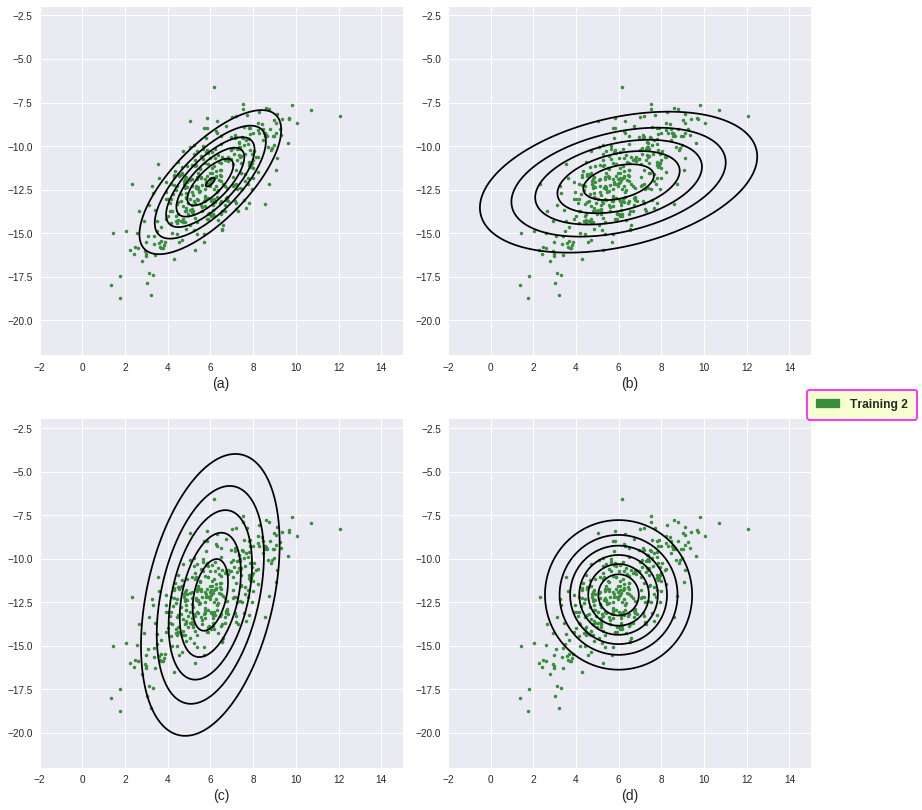

In [46]:
var_task(cov_task1(),cov_task1(),cov_task1())

Confusion Matrix : [[124, 0, 1], [0, 125, 0], [0, 0, 125]]
Accuracy : 0.997333333333
Precision :[1.0, 1.0, 0.9920634920634921] Mean Precision : 0.997354497354
Recall :[0.992, 1.0, 1.0] Mean Recall : 0.997333333333
F-measure :[0.9959839357429718, 1.0, 0.9960159362549801] Mean F-measure : 0.997333290666


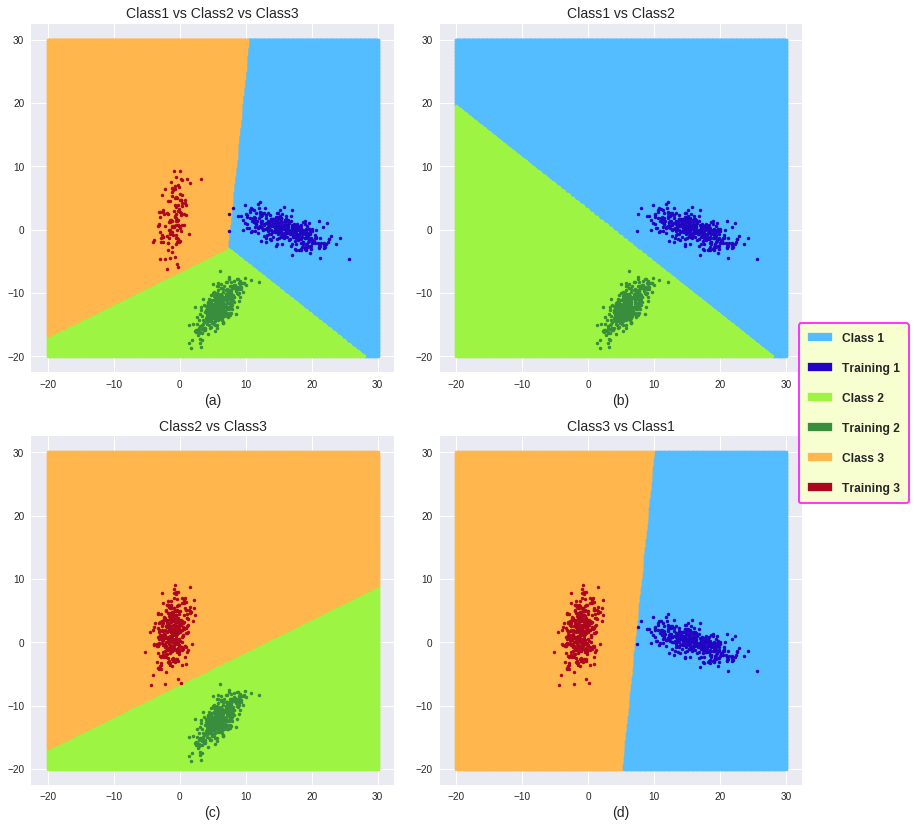

In [6]:
# part(a)
task(cov_task1(),cov_task1(),cov_task1())
stats(cov_task1(),cov_task1(),cov_task1())

/home/prabhakar/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:106: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
/home/prabhakar/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:113: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
/home/prabhakar/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:120: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.


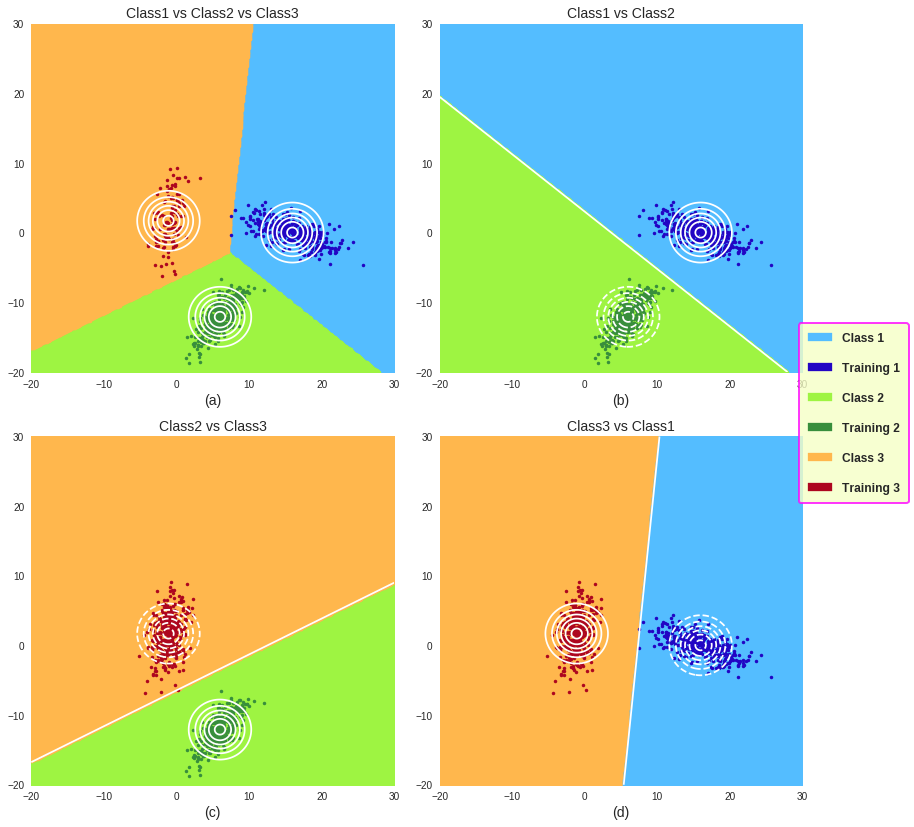

In [49]:
task(cov_task1(),cov_task1(),cov_task1(),True)

In [ ]:
# part(b)
task(cov_task2(),cov_task2(),cov_task2())
stats(cov_task2(),cov_task2(),cov_task2())

In [ ]:
task(cov_task2(),cov_task2(),cov_task2(), True)

In [ ]:
# part(c)
cov_a,cov_b,cov_c=cov_task3()
# print cov_a,cov_b,cov_c
task(cov_a,cov_b,cov_c)
stats(cov_a,cov_b,cov_c)

In [ ]:
task(cov_a,cov_b,cov_c, True)

Confusion Matrix : [[125, 0, 0], [0, 125, 0], [0, 0, 125]]
Accuracy : 1.0
Precision :[1.0, 1.0, 1.0] Mean Precision : 1.0
Recall :[1.0, 1.0, 1.0] Mean Recall : 1.0
F-measure :[1.0, 1.0, 1.0] Mean F-measure : 1.0


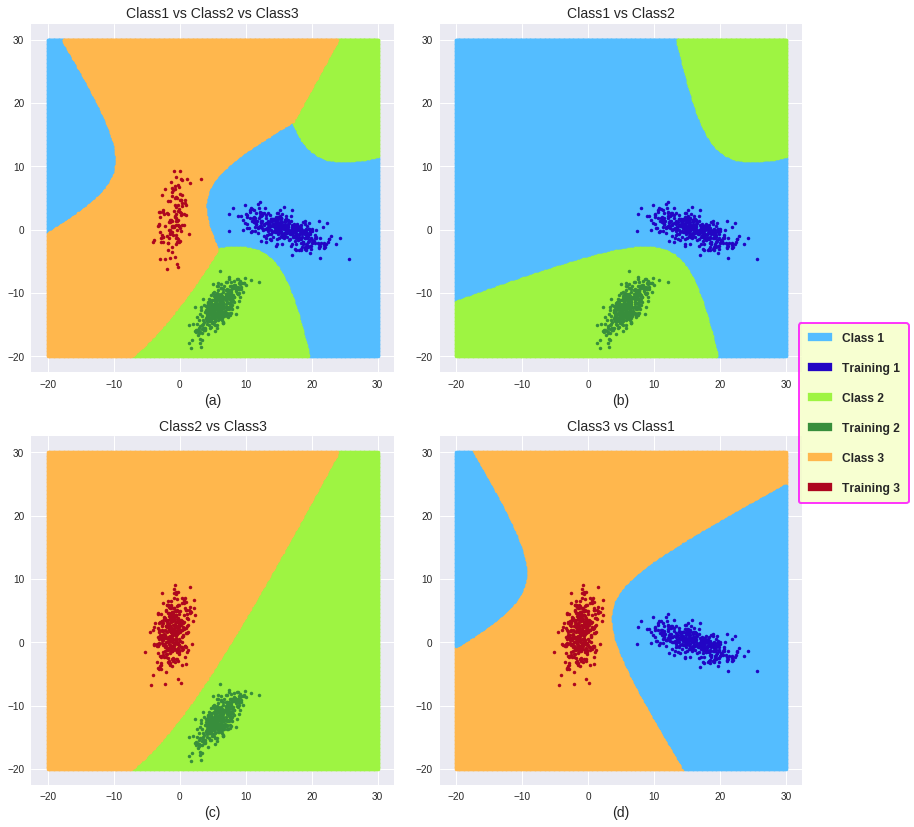

In [48]:
# part(d)
task(cov1,cov2,cov3)
stats(cov1,cov2,cov3)

/home/prabhakar/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:106: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
/home/prabhakar/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:113: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
/home/prabhakar/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:120: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.


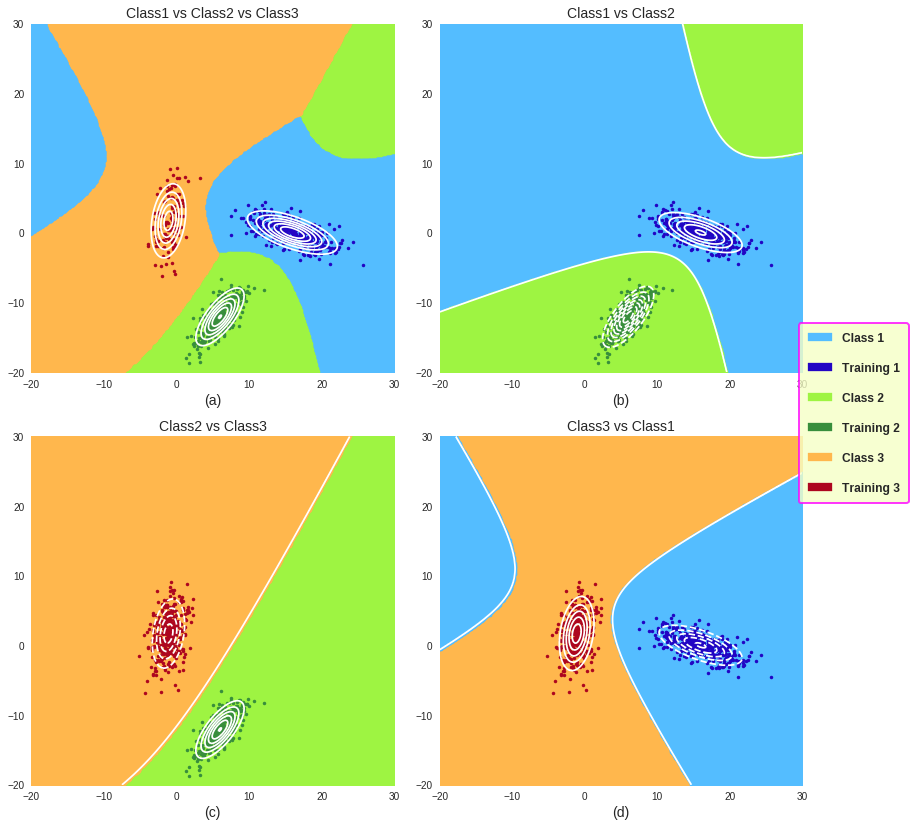

In [47]:
task(cov1,cov2,cov3, True)

In [ ]:
import matplotlib.pyplot

X=np.linspace(-20,32,200)
Y=np.linspace(-20,12,200)

XX=[]
YY=[]
for i in range(0, len(X)):
    for j in range(0, len(X)):
        XX.append(X[i])

for i in range(0, len(Y)):
    for j in range(0, len(Y)):
        YY.append(Y[j])

XY=[[XX[i],YY[i]] for i in range(0,len(XX))]

test_data_name = XY
cov_a=cov1
cov_b=cov2
cov_c=cov3
res1=g_x(test_data_name, mean1, cov_a)
res2=g_x(test_data_name, mean2, cov_b)
res3=g_x(test_data_name, mean3, cov_c)

def maha_graph():
    ans = []
    for i in range(len(XY)):
        tutu = []
        pota1 = float(np.exp(res1[i]))
        pota2 = float(np.exp(res2[i]))
        pota3 = float(np.exp(res3[i]))
        tutu.append(round(pota1/(pota1+pota3+pota2),8))
        tutu.append(round(pota2/(pota1+pota3+pota2),8))
        tutu.append(round(pota3/(pota1+pota3+pota2),8))
        ans.append(tuple(tutu))
    return ans

colour_hex = maha_graph()
matplotlib.pyplot.scatter(XX,YY,color=colour_hex)

# Below Codes are not needed.

In [ ]:
def task1234(cov_a,cov_b,cov_c):
    test_data_name = total_test_data
    res1=g_x(test_data_name, mean1, cov_a)
    res2=g_x(test_data_name, mean2, cov_b)
    res3=g_x(test_data_name, mean3, cov_c)

    def dbb():
        ans=[]
        for i in range(0,len(res1)):
    #         print res1[i],res2[i],res3[i]
            val=1
            temp=res1[i]
            if(res2[i]>temp):
                val=2
                temp=res2[i]
            if(res3[i]>temp):
                val=3
            ans.append(val)
        return ans
    ans= dbb()
    def conf_mat():
        m=[]
        count1=0
        count12=0
        count2=0
        count21=0
        count3=0
        count31=0
        for i in range(0, len(test_data1)):
            if(ans[i]==1):
                count1 = count1+1;
            if(ans[i]==2):
                count12 = count12+1;
        for i in range(len(test_data1), len(test_data1)+len(test_data2)):
            if(ans[i]==2):
                count2 = count2+1;
            if(ans[i]==1):
                count21 = count21+1;
        for i in range(len(test_data1)+len(test_data2), len(total_test_data)):
            if(ans[i]==3):
                count3 = count3+1;
            if(ans[i]==1):
                count31 = count31+1;
    #     print len(test_data1), count1
    #     print len(test_data2), count2
        mm=[count1,count12,len(test_data1)-count1-count12]
        m.append(mm)
        mm=[count21, count2, len(test_data2)-count21-count2]
        m.append(mm)
        mm=[count31, len(test_data3)-count31-count3, count3]
        m.append(mm)
        return m

    m=conf_mat()
    accuracy=(sum([m[i][i] for i in range(0,3)]))/(float)(sum([sum(m[i]) for i in range(0,3)]))
    precision=[m[i][i]/(float)(m[0][i]+m[1][i]+m[2][i]) for i in range(0,3)]
    recall=[m[i][i]/(float)(m[i][0]+m[i][1]+m[i][2]) for i in range(0,3)]
    f_measure=[(2*precision[i]*recall[i])/(precision[i]+recall[i]) for i in range(0,3)]
    
    mean_precision=sum([precision[i] for i in range(0,3)])/3.0
    mean_recall=sum([recall[i] for i in range(0,3)])/3.0
    mean_f_measure=sum([f_measure[i] for i in range(0,3)])/3.0
    
    print "Confusion Matrix : {0}".format(m)
    print "Accuracy :",accuracy
    print "Precision :{0}".format(precision),"Mean Precision :",mean_precision
    print "Recall :{0}".format(recall),"Mean Recall :",mean_recall
    print "F-measure :{0}".format(f_measure),"Mean F-measure :",mean_f_measure
    


    import numpy as np
    %matplotlib inline

    import matplotlib
    import matplotlib.pyplot as plt
    matplotlib.style.use('seaborn')
    

    X=np.linspace(-20,32,400)
    Y=np.linspace(-20,12,400)

    XX=[]
    YY=[]
    for i in range(0, len(X)):
        for j in range(0, len(X)):
            XX.append(X[i])

    for i in range(0, len(Y)):
        for j in range(0, len(Y)):
            YY.append(Y[j])

    XY=[[XX[i],YY[i]] for i in range(0,len(XX))]

    test_data_name = XY
    res1=g_x(test_data_name, mean1, cov_a)
    res2=g_x(test_data_name, mean2, cov_b)
    res3=g_x(test_data_name, mean3, cov_c)

    c={}
    c[1]='#FFFF00'
    c[2]='#B2FF59'
    c[3]='#FFAB40'

    c2={}
    c2[1]='#F57F17'
    c2[2]='#33691E'
    c2[3]='#F06292'
    
    legend_facecolor='#f0afdf'
    legend_edgecolor='blue'
    legend_linewidth=2
    legend_loc='upper right'
    
    x=[]
    y=[]
    for i in range(0,4):
        vv=[]
        v=[]
        x.append(v)
        y.append(vv)

    def db123():
        for i in range(0,len(res1)):
    #         print res1[i],res2[i],res3[i]
            val=1
            temp=res1[i]
            if(res2[i]>temp):
                val=2
                temp=res2[i]
            if(res3[i]>temp):
                val=3
            x[val].append(XY[i][0])
            y[val].append(XY[i][1])

    res = db123()

    plt.plot(x[1],y[1],c[1],marker='.',linestyle='None')
    plt.plot(x[2],y[2],c[2],marker='.',linestyle='None')
    plt.plot(x[3],y[3],c[3],marker='.',linestyle='None')

    X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
    Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
    plt.plot(X,Y,c=c2[1],marker='.',linestyle='None')

    X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
    Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
    plt.plot(X,Y,c=c2[2],marker='.',linestyle='None')

    X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
    Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
    plt.plot(X,Y,c=c2[3],marker='.',linestyle='None')
    plt.rcParams['figure.figsize'] = [20, 12]
    
    plt.title('Class 1 vs 2 vs 3')
    
    colors = [c[1],c[2],c[3],c2[1],c2[2],c2[3]]
    texts = ["Class 1", "Class 2","Class 3","Test 1", "Test 2", "Test 3"]
    
    handles = [plt.Rectangle((0,0),1,1,color=colors[i]) for i  in range(len(texts))]
    legend=plt.legend(handles=handles, labels=texts, frameon=1,loc=legend_loc, ncol=3)
    
    frame = legend.get_frame()
    frame.set_facecolor(legend_facecolor)
    frame.set_edgecolor(legend_edgecolor)
    frame.set_linewidth(legend_linewidth)
    
    plt.show()

    x=[]
    y=[]
    for i in range(0,4):
        vv=[]
        v=[]
        x.append(v)
        y.append(vv)
    def db12():
        for i in range(0,len(res1)):
    #         print res1[i],res2[i],res3[i]
            val=1
            temp=res1[i]
            if(res2[i]>temp):
                val=2
                temp=res2[i]
    #         if(res3[i]>temp):
    #             val=3
            x[val].append(XY[i][0])
            y[val].append(XY[i][1])

    res = db12()
    plt.plot(x[1],y[1],c[1],marker='.',linestyle='None')
    plt.plot(x[2],y[2],c[2],marker='.',linestyle='None')
    # plt.plot(x[3],y[3],c[3],marker='.',linestyle='None')

    X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
    Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
    plt.plot(X,Y,c=c2[1],marker='.',linestyle='None')

    X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
    Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
    plt.plot(X,Y,c=c2[2],marker='.',linestyle='None')
    # X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
    # Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
    # plt.plot(X,Y,c=c2[3],marker='.',linestyle='None')
    plt.rcParams['figure.figsize'] = [20, 12]
    plt.title('Class 1 vs 2')
    
    colors = [c[1],c[2],c[3],c2[1],c2[2],c2[3]]
    texts = ["Class 1","Class 2","Test 1", "Test 2"]
    
    handles = [plt.Rectangle((0,0),1,1,color=colors[i]) for i  in range(len(texts))]
    legend=plt.legend(handles=handles, labels=texts, frameon=1,loc=legend_loc, ncol=2)
    
    frame = legend.get_frame()
    frame.set_facecolor(legend_facecolor)
    frame.set_edgecolor(legend_edgecolor)
    frame.set_linewidth(legend_linewidth)
    
    plt.show()

    x=[]
    y=[]
    for i in range(0,4):
        vv=[]
        v=[]
        x.append(v)
        y.append(vv)
    def db13():
        for i in range(0,len(res1)):
    #         print res1[i],res3[i]
            val=1
            temp=res1[i]
    #         if(res2[i]>temp):
    #             val=2
    #             temp=res2[i]
            if(res3[i]>temp):
                val=3
            x[val].append(XY[i][0])
            y[val].append(XY[i][1])

    res = db13()
    plt.plot(x[1],y[1],c[1],marker='.',linestyle='None')
    # plt.plot(x[2],y[2],c[2],marker='.',linestyle='None')
    plt.plot(x[3],y[3],c[3],marker='.',linestyle='None')

    X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
    Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
    plt.plot(X,Y,c=c2[1],marker='.',linestyle='None')

    # X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
    # Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
    # plt.plot(X,Y,c=c2[2],marker='.',linestyle='None')

    X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
    Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
    plt.plot(X,Y,c=c2[3],marker='.',linestyle='None')
    plt.rcParams['figure.figsize'] = [20, 12]
    plt.title('Class 1 vs 3')
    
    colors = [c[1],c[2],c[3],c2[1],c2[2],c2[3]]
    texts = ["Class 1","Class 3","Test 1", "Test 3"]
    
    handles = [plt.Rectangle((0,0),1,1,color=colors[i]) for i  in range(len(texts))]
    legend=plt.legend(handles=handles, labels=texts, frameon=1,loc=legend_loc, ncol=2)
    
    frame = legend.get_frame()
    frame.set_facecolor(legend_facecolor)
    frame.set_edgecolor(legend_edgecolor)
    frame.set_linewidth(legend_linewidth)
    
    plt.show()

    x=[]
    y=[]
    for i in range(0,4):
        vv=[]
        v=[]
        x.append(v)
        y.append(vv)
    def db23():
        for i in range(0,len(res1)):
    #         print res1[i],res2[i],res3[i]
            val=2
            temp=res2[i]
    #         if(res2[i]>temp):
    #             val=2
    #             temp=res2[i]
            if(res3[i]>temp):
                val=3
            x[val].append(XY[i][0])
            y[val].append(XY[i][1])

    res = db23()
    # plt.plot(x[1],y[1],c[1],marker='.',linestyle='None')
    plt.plot(x[2],y[2],c[2],marker='.',linestyle='None')
    plt.plot(x[3],y[3],c[3],marker='.',linestyle='None')

    # X=[test_data1[i][0] for i in range(0,len(test_data1)) ]
    # Y=[test_data1[i][1] for i in range(0,len(test_data1)) ]
    # plt.plot(X,Y,c=c2[1],marker='.',linestyle='None')

    X=[test_data2[i][0] for i in range(0,len(test_data2)) ]
    Y=[test_data2[i][1] for i in range(0,len(test_data2)) ]
    plt.plot(X,Y,c=c2[2],marker='.',linestyle='None')

    X=[test_data3[i][0] for i in range(0,len(test_data3)) ]
    Y=[test_data3[i][1] for i in range(0,len(test_data3)) ]
    plt.plot(X,Y,c=c2[3],marker='.',linestyle='None')

    plt.rcParams['figure.figsize'] = [20, 12]
    plt.title('Class 2 vs 3')
    
    colors = [c[1],c[2],c[3],c2[1],c2[2],c2[3]]
    texts = ["Class 2","Class 3","Test 2", "Test 3"]
    
    handles = [plt.Rectangle((0,0),1,1,color=colors[i]) for i  in range(len(texts))]
    legend=plt.legend(handles=handles, labels=texts, frameon=1,loc=legend_loc, ncol=2)
    
    frame = legend.get_frame()
    frame.set_facecolor(legend_facecolor)
    frame.set_edgecolor(legend_edgecolor)
    frame.set_linewidth(legend_linewidth)
    
    
    
    plt.show()

## Calling part(a)

In [ ]:
# task1234(cov_task1(),cov_task1(),cov_task1())

## Calling part(b)

In [ ]:
# task1234(cov_task2(),cov_task2(),cov_task2())

## Calling part(c)

In [ ]:
# cov_a,cov_b,cov_c=cov_task3()
# task1234(cov_a,cov_b,cov_c)

## Calling part(d)

In [ ]:
# task1234(cov1,cov2,cov3)

# Finished. Codes below this cell are redundant. Thanks.